# Exploratory Data Analysis of the Olympic Dataset

## Introduction
In this analysis, we delve into the comprehensive Olympic dataset to uncover insights related to global athletic participation and performance over the years. The dataset includes detailed records of medal tallies, athlete statistics, and event information across various Olympic Games, allowing us to explore trends and patterns in athletic achievements.

## Objectives
Our exploration is structured into four key sections:
1. **Overall Medal Tally**: This section provides a detailed overview of the medal tally for all participating countries throughout Olympic history, highlighting trends and patterns in achievements.
2. **Overall Analysis**: Here, we analyze various statistics, including the number of nations participating over the years, total events held, athlete participation trends, and the evolution of events across different sports. Additionally, we will identify the most popular athletes based on regional performance.
3. **Athlete-wise Analysis**: We will explore the distribution of athletes’ ages and their respective sports, as well as analyze height and weight distributions. Furthermore, we will investigate the trends in male and female participation over the years.

## Dataset
The dataset utilized for this analysis encompasses a rich collection of Olympic records, including information on athletes, sports, events, and medal counts from various Olympic Games.
The source of the dataset is in this [link](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results)

Through this comprehensive EDA, we aim to provide valuable insights into the dynamics of the Olympic Games, celebrating athletic achievements while identifying trends that shape future competitions.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly.express as px

In [37]:
# importing/reading datasets
df = pd.read_csv(r'athlete_events.csv')
df_region = pd.read_csv(r'noc_regions.csv')

In [27]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [28]:
df_region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [29]:
df.shape

(271116, 15)

- The dataset consists of **271,116 entries**, each representing an athlete's participation in various Olympic events.
- Key attributes include:
  - **Athlete ID**: Unique identifier for each athlete
  - **Name**: Athlete's name
  - **Gender**: Male or Female
  - **Age**: Age of the athlete
  - **Height**: Height in centimeters
  - **Weight**: Weight in kilograms
  - **Team**: Team affiliation
  - **Event details**: Information about the events
  - **Medal outcomes**: Gold, Silver, Bronze, or NA
- The noc column from both the dataframes can be used to combine both the dataframes
    - This gives us another useful feature **region/country**.
- This structure enables a comprehensive analysis of:
  - Athlete performance
  - Participation trends across different Olympic Games
  
#### Since we are focusing only on summer olympics we filter out 'winter' from the season column

In [38]:
df = df[df['Season'] == 'Summer']
df.shape

(222552, 15)

* The season column can be removed since all events pertain to the Summer Olympics.
* The Games column can also be eliminated, as the Year column provides a clearer representation of the event timeline.

In [39]:
df = df.drop(['Season','Games'],axis=1)
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,NaN


In [40]:
# merging df_region and df
df = df.merge(df_region,how = 'left', on = 'NOC')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


* Now we have also got the region for analysis
* We can remove the notes column as it is irrelavant for the analysis

In [41]:
del df['notes']
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Year',
       'City', 'Sport', 'Event', 'Medal', 'region'],
      dtype='object')

In [42]:
# checking for null values.
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Year           0
City           0
Sport          0
Event          0
Medal     188464
region       370
dtype: int64

* Out of 2.71 Lakh entries there are null values in various columns. We can take **Medal** column out of it as not winning a medal is represented with nan value.
* The **age, Height, Weight** columns should be handled either by replacing them with mode or by dropping them based on the context


In [43]:
# checking for duplicated values in dataframe
df.duplicated().sum()

1385

* Some rows are duplicated, let's drop these duplicated records

In [44]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

## Data Analysis

### 1. Medal Tally

In [32]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [45]:
# one hot encoding to represent eaxh medal individually
medal_dummies = pd.get_dummies(df['Medal'], dtype = int)
medal_dummies

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
222547,0,0,0
222548,0,0,0
222549,0,0,0
222550,0,0,0


In [46]:
# merging the dummy columns into the dataframe
df = pd.concat([df, medal_dummies], axis = 1)
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,region,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,NaN,China,0,0,0


#### Grouping region based on number of medals won throughout

In [24]:
df.groupby('region')[['Gold','Silver','Bronze']].sum().sort_values('Gold', ascending=False).reset_index()

,region,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,Russia,1220,974,994
2,Germany,1075,987,1064
3,UK,635,729,620
4,Italy,518,474,454
...,...,...,...,...
200,Lesotho,0,0,0
201,Albania,0,0,0
202,Libya,0,0,0
203,Liechtenstein,0,0,0


**Observation:**
* This gave us the number of Gold, Silver, Bronze and Total medals won by each region
* On cross verifying online, the count is wrong, a close look at the data revealed that in team events, all the players in the team as counted as medalists, so instead of one gold medal, a team of 5 with one gold medal is counted as 5 in dataset
* To remove this we can drop duplicates based on team, year, sport, event and medal

In [52]:
medal_tally = df.drop_duplicates(subset = ['Team','NOC','Year','City','Sport','Event','Medal'])
medal_tally = medal_tally.groupby('region')[['Gold','Silver','Bronze']].sum().sort_values('Gold', ascending=False).reset_index()
medal_tally['Total']= medal_tally[['Gold','Silver','Bronze']].sum(axis = 1)
medal_tally

,region,Gold,Silver,Bronze,Total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777
...,...,...,...,...,...
200,Lesotho,0,0,0,0
201,Albania,0,0,0,0
202,Libya,0,0,0,0
203,Liechtenstein,0,0,0,0


**These are correct numbers**

Looks like USA in on the top followed by Russia and Germany

## 2. Overall Analysis

* No. of editions
* No. of cities
* No of events/sports
* No. of athletes
* participating nations

In [50]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,region,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,NaN,China,0,0,0


In [9]:
df['Year'].unique()

array([1992, 2012, 1920, 1900, 1932, 1952, 2000, 1996, 1912, 1924, 1948,
       2008, 2016, 2004, 1984, 1968, 1972, 1988, 1936, 1956, 1960, 1928,
       1976, 1980, 1964, 1906, 1904, 1908, 1896], dtype=int64)

**Observation:**
* we can see that olympics happen at an interval of **4 years** except for **1904,1906,1908** , Reserach tells that olympic event did happen in year 1906 but later considered that it doesn't fit the pattern so it was discontinued

In [53]:
number_of_editions = df['Year'].unique().shape[0]
number_of_editions

29

In [55]:
number_of_cities = df['City'].unique()
number_of_cities.shape[0]

23

In [57]:
number_of_sports = df['Sport'].unique().shape[0]
number_of_sports

52

In [58]:
number_of_events = df['Event'].unique().shape[0]
number_of_events

651

In [59]:
atheletes = df['Name'].unique().shape[0]
atheletes

116122

In [60]:
countries = df['region'].unique().shape[0]
countries

206

### Participating nations over time

In [12]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0


In [63]:
# dropping duplicates on region and year since there may be multiple atheltes from same region
# we don't want to count a region twice in same year
nations_participations = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index()
nations_participations = nations_participations.sort_values('Year',ignore_index=True)
nations_participations.head()

,Year,count
0,1896,12
1,1900,31
2,1904,14
3,1906,20
4,1908,22


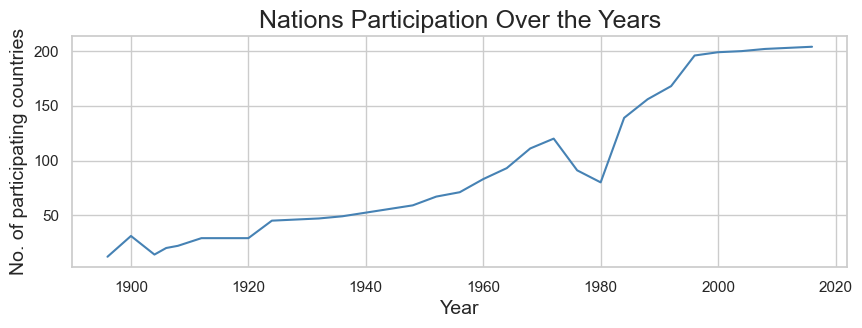

In [73]:
plt.figure(figsize = (10,3))
sns.set(style="whitegrid")
sns.lineplot(x='Year', y='count', data=nations_participations, color='steelblue')

# Customize the plot
plt.xlabel('Year', fontsize=14)
plt.ylabel('No. of participating countries', fontsize=14)
plt.title('Nations Participation Over the Years', fontsize = 18)
plt.grid(True)

plt.show()

**Observation:**
* The graph shows an overall increasing trend in participation, except for a **dip in 1980**. Upon further research, it was found that the **1980 Olympics** in Moscow saw many countries boycotting the event in response to the Soviet Union's invasion of Afghanistan, leading to a significant decrease in participation that year.

### Number of Events

In [82]:
no_of_events = df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index()
no_of_events = no_of_events.sort_values('Year',ignore_index=True)
no_of_events.head()

,Year,count
0,1896,43
1,1900,90
2,1904,95
3,1906,74
4,1908,109


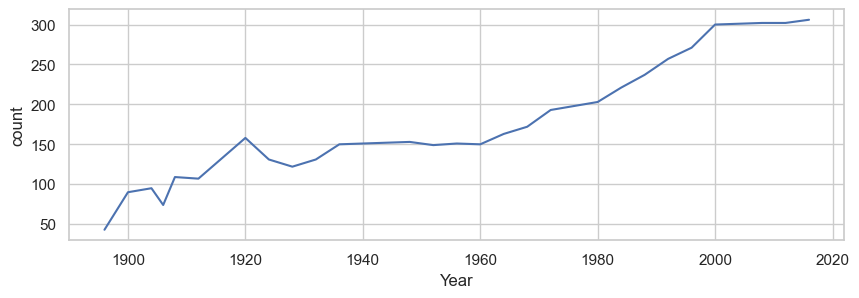

In [80]:
plt.figure(figsize = (10,3))
sns.lineplot(no_of_events, x='Year', y='count')
plt.show()

**Observation:**
* The number of events conducted in the olympics has significantly increased over the years.

### Atheletes participation over the years

In [83]:
Atheltes_over_years = df.drop_duplicates(['Year','Name'])['Year'].value_counts().reset_index()
Atheltes_over_years = Atheltes_over_years.sort_values('Year',ignore_index=True)
Atheltes_over_years.head()

,Year,count
0,1896,176
1,1900,1220
2,1904,650
3,1906,841
4,1908,2024


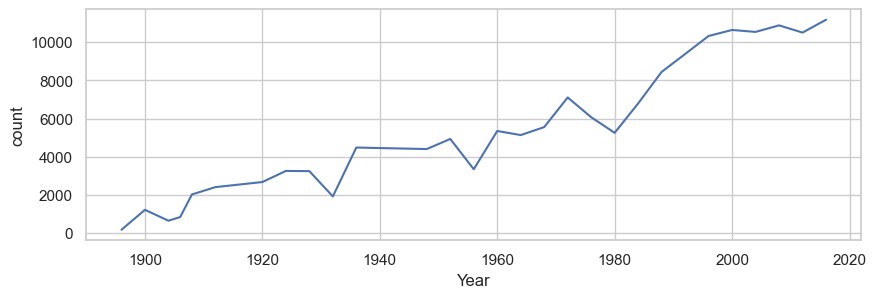

In [84]:
plt.figure(figsize = (10,3))
sns.lineplot(Atheltes_over_years, x='Year', y='count')
plt.show()

**Observation:**
* Number of atheletes particiaption also increased over the year there are slight dips in the graph with less participation, looking at it we may think of historical incidents that might have made countries to n participate in some events

## number of sports in each event

In [91]:
sports = df.drop_duplicates(['Year','Sport','Event'])

In [92]:
sports_pivot = sports.pivot_table(index = 'Sport', columns='Year',values = 'Event', aggfunc='count')
sports_pivot = sports_pivot.fillna(0).astype('int')


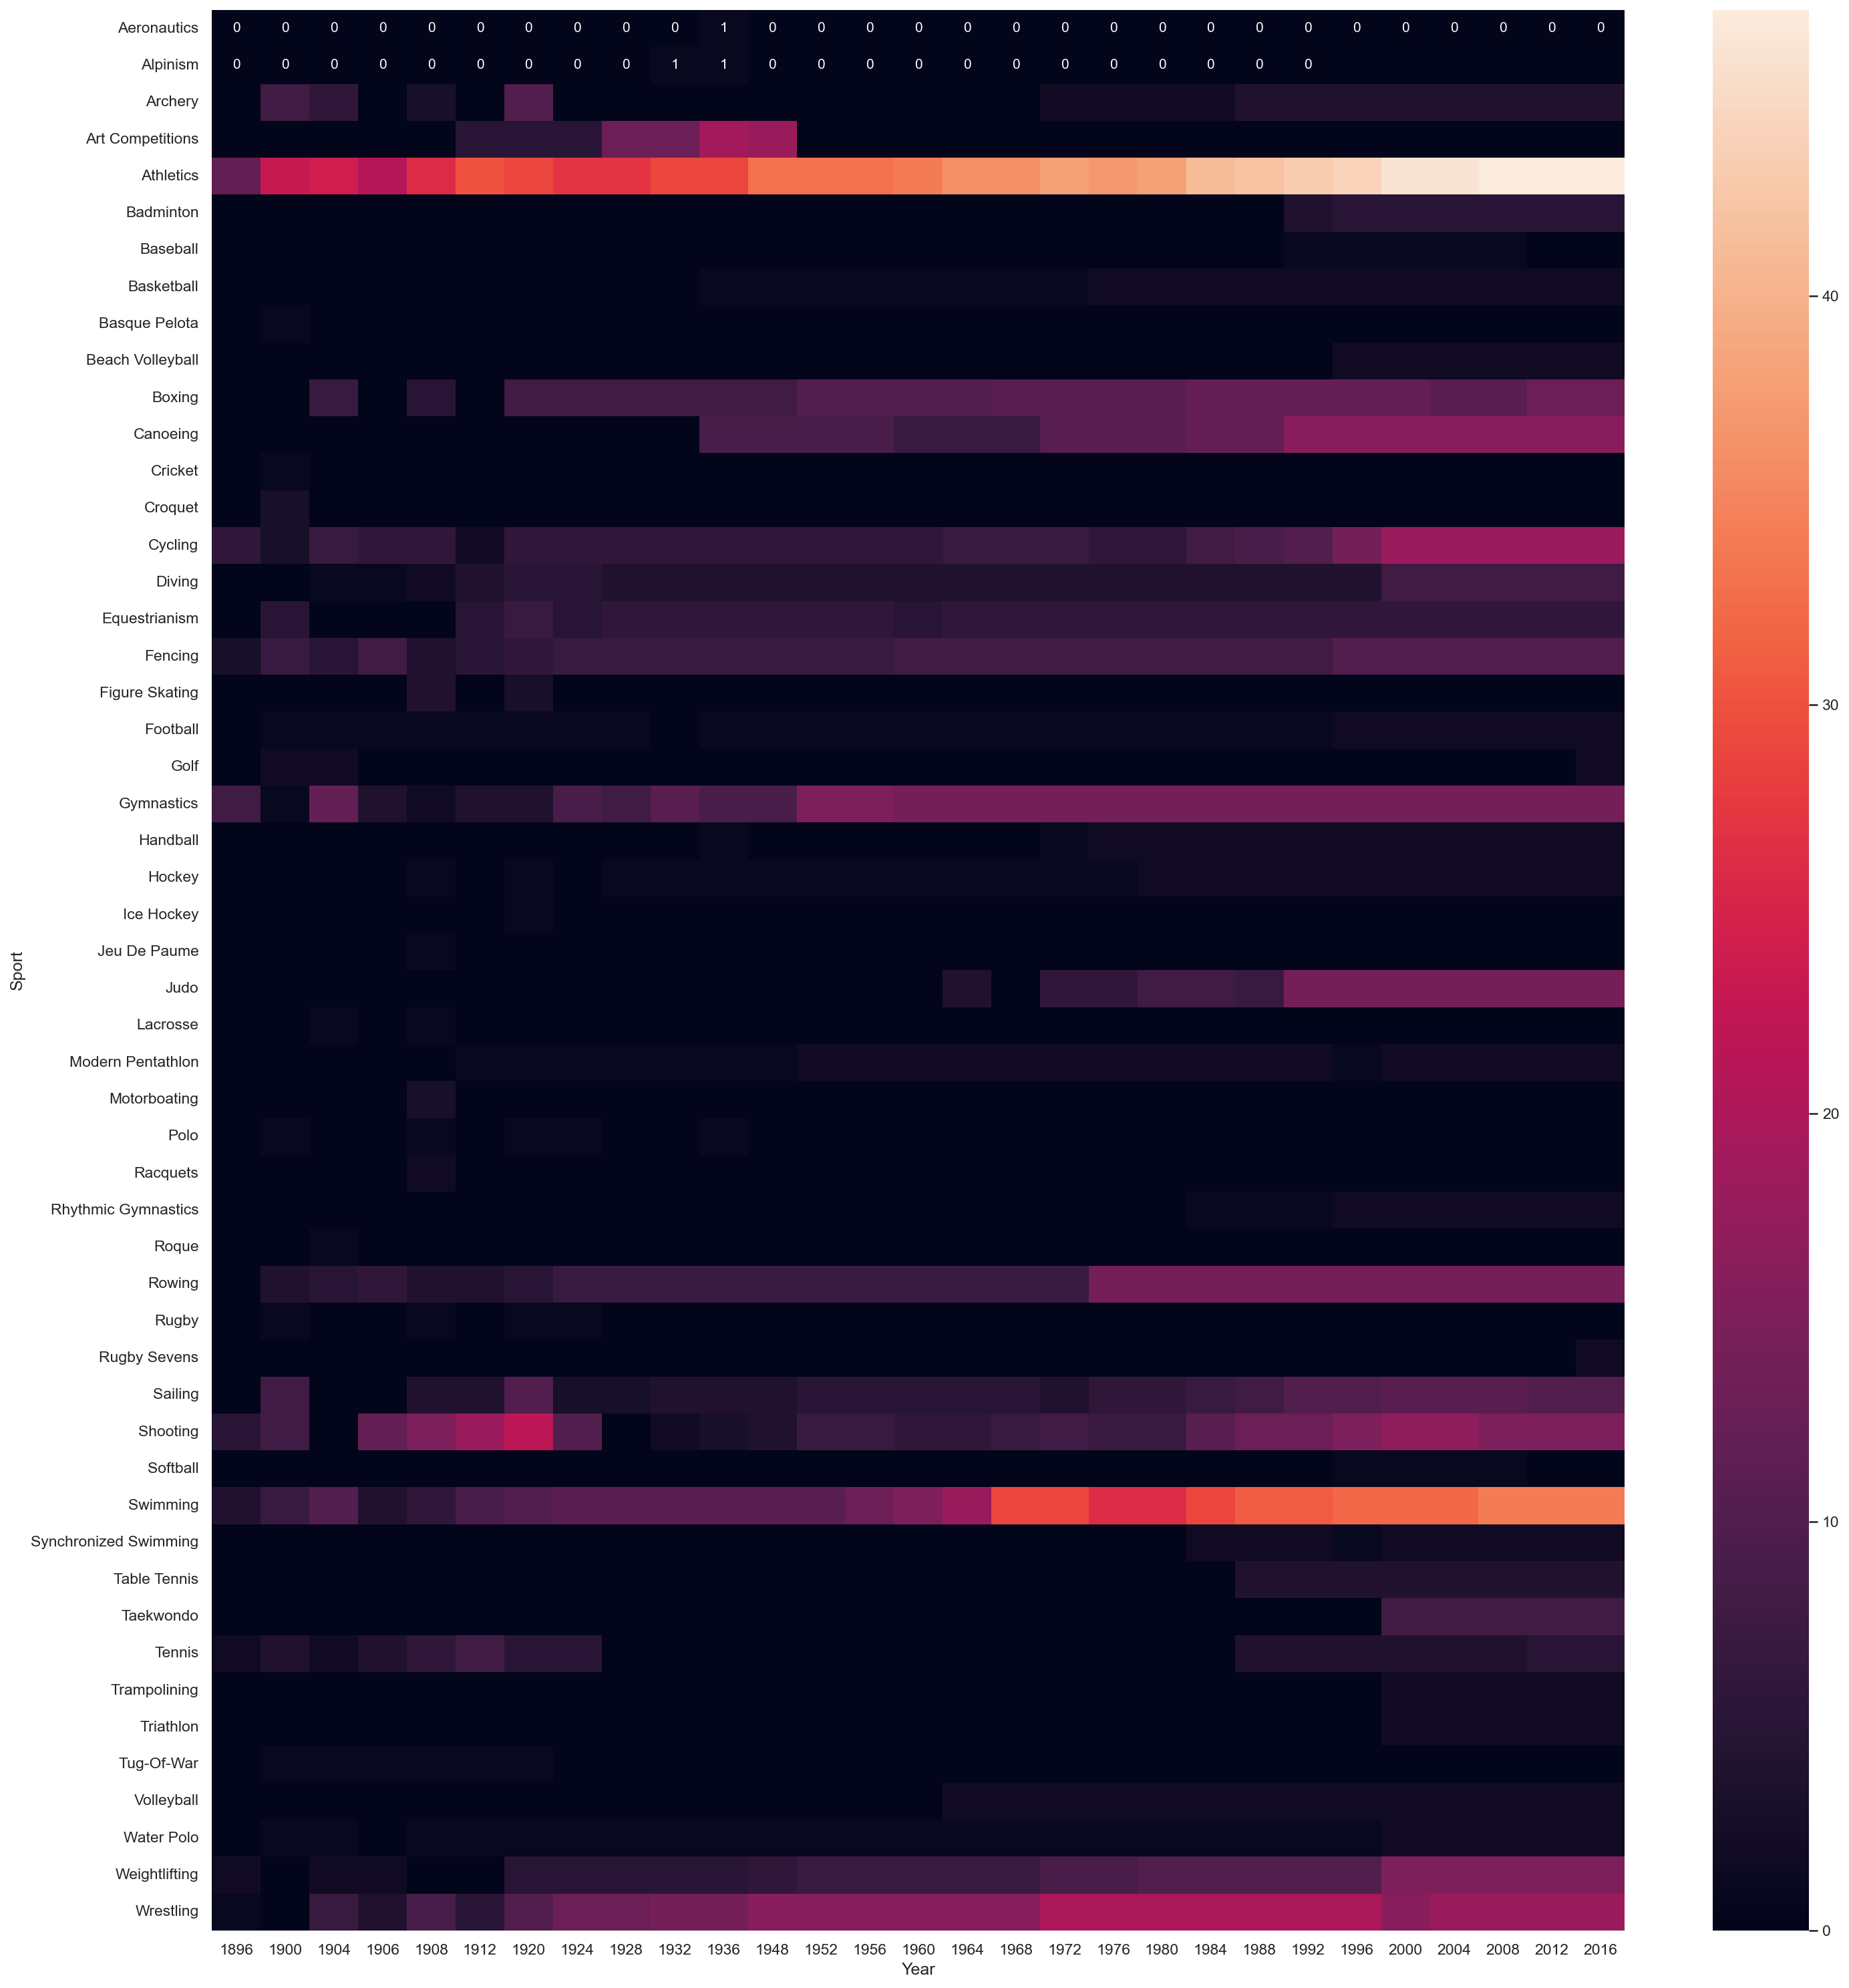

In [86]:
plt.figure(figsize= (20,20), dpi = 150)
sns.heatmap(sports_pivot, annot = True, fmt='d', annot_kws={"size": 10})

plt.yticks(rotation=0) 
plt.tight_layout()
plt.show()

**Observation:**
* From the heatmap we can say that atheletics and swimming events are much more than any other sport in the olympics, there are some sports which are introduced and immediatly dropped in the next edition of olympics (Ex.cricket)

In [93]:
df_medalists = df.dropna(subset=['Medal']) 
df_medalists.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,region,Bronze,Gold,Silver
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,0,1,0
12,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,1,0,0


In [94]:
# In team sports every indidvual is counted as medal winner

df_medalists.drop_duplicates(subset=['Team','NOC','Year','City','Sport','Event','Medal'],inplace = True)
df_medalists.shape

C:\Users\nitin\AppData\Local\Temp\ipykernel_328\47416455.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(16074, 17)

In [98]:
region = 'USA'
df_medalists_region = df_medalists[df['region'] == region ]
df_medalists_region =  df_medalists_region.groupby('Year')['Medal'].count().reset_index()

C:\Users\nitin\AppData\Local\Temp\ipykernel_328\279932493.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [101]:
plt.figure(figsize = (10,3))
fig = px.line(df_medalists_region, x='Year', y='Medal',
             title="Medals won Over the Years")

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Medals Won'
)

fig.show()

<Figure size 1000x300 with 0 Axes>

## 3.  Athelete wise Analysis

In [102]:
import plotly.figure_factory as ff

In [192]:
df.shape

(221167, 20)

In [103]:
# dropping details of atheletes that are duolicated
df_atheletes = df.drop_duplicates(subset=['Name','region'])
df_atheletes= df_atheletes.dropna(subset=['Age'])
ages = df_atheletes['Age']
gold_ages = df_atheletes[df_atheletes['Medal']=='Gold']['Age']
silver_ages = df_atheletes[df_atheletes['Medal']=='Silver']['Age']
bronze_ages = df_atheletes[df_atheletes['Medal']=='Bronze']['Age']

In [104]:
fig = ff.create_distplot([ages,gold_ages,silver_ages,bronze_ages],['Overall Age Distribution','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)

# Update traces with a specific color and line width
fig.update_traces(
    line=dict(width=3)
)
# Update the layout to include gridlines, axis titles, etc.
fig.update_layout(
    xaxis=dict(showgrid=True, gridwidth=0.5, gridcolor='#7f7f7f'),
    yaxis=dict(showgrid=True, gridwidth=0.5, gridcolor='#7f7f7f'),
    xaxis_title='Age',
    yaxis_title='Density',
)

# Show the figure
fig.show()

**Observation:**
* The data shows that most of the medalists lie in the age range of 20-30 ages
* From the overall age distribution we can also say that many of the atheletes participate during ages 20-30 thus higher density of medalists in the same age range

## Age analysis by famous sport


* Below is a list of many popular sports for the analysis

In [105]:
famous_sport = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
                'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling'
                'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Shooting' ,
                'Boxing', 'Taekwondo', 'Cycling', 'Diving' , 'Canoeing'
                'Tennis', 'Golf', 'Softball', 'Archery',
                'Volleyball', 'Synchronized Swimming', 'Table Tennis','Baseball'
                'Rhythmic Gymnastics', 'Rugby Sevens',
               'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey'
               ]

In [108]:
df_atheletes = df.drop_duplicates(subset=['Name','region'])
df_atheletes= df_atheletes.dropna(subset=['Age'])
x=[]
name=[]
famous_sport = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
                'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling'
                'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Shooting',
                'Boxing', 'Taekwondo', 'Cycling', 'Diving' , 'Canoeing'
                'Tennis', 'Golf', 'Softball', 'Archery',
                'Volleyball', 'Synchronized Swimming', 'Table Tennis','Baseball'
                'Rhythmic Gymnastics', 'Rugby Sevens',
               'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey'
               ]
for sport in famous_sport:
    temp_df = df_atheletes[df_atheletes['Sport']==sport]
    gold_medal_ages = temp_df[temp_df['Medal']=='Gold']['Age'].dropna()
    
    if not gold_medal_ages.empty:  # Check if the list is not empty
        x.append(gold_medal_ages)
        name.append(sport)


In [109]:

fig = ff.create_distplot(x,name,show_hist=False,show_rug=False)

# Update traces with a specific color and line width
fig.update_traces(
    line=dict(width=3)
)

# Update the layout to include gridlines, axis titles, etc.
fig.update_layout(
    xaxis=dict(showgrid=True, gridwidth=0.5, gridcolor='#7f7f7f'),
    yaxis=dict(showgrid=True, gridwidth=0.5, gridcolor='#7f7f7f'),
    xaxis_title='Age',
    yaxis_title='Density',
)

# Show the figure
fig.show()

**Observation:**
* Many athletes tend to participate at a young age across most sports. However, a few sports, such as golf, diving, archery, and rugby, have a notable number of participants over 30 years of age, indicating that these sports may attract older competitors.

In [11]:
# for medals analysis replacing NAN in medal column with 'No Medal' value
df_atheletes['Medal'].fillna('No Medal', inplace = True)

In [110]:
df_atheletes.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Year,City,Sport,Event,Medal,region,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,NaN,China,0,0,0


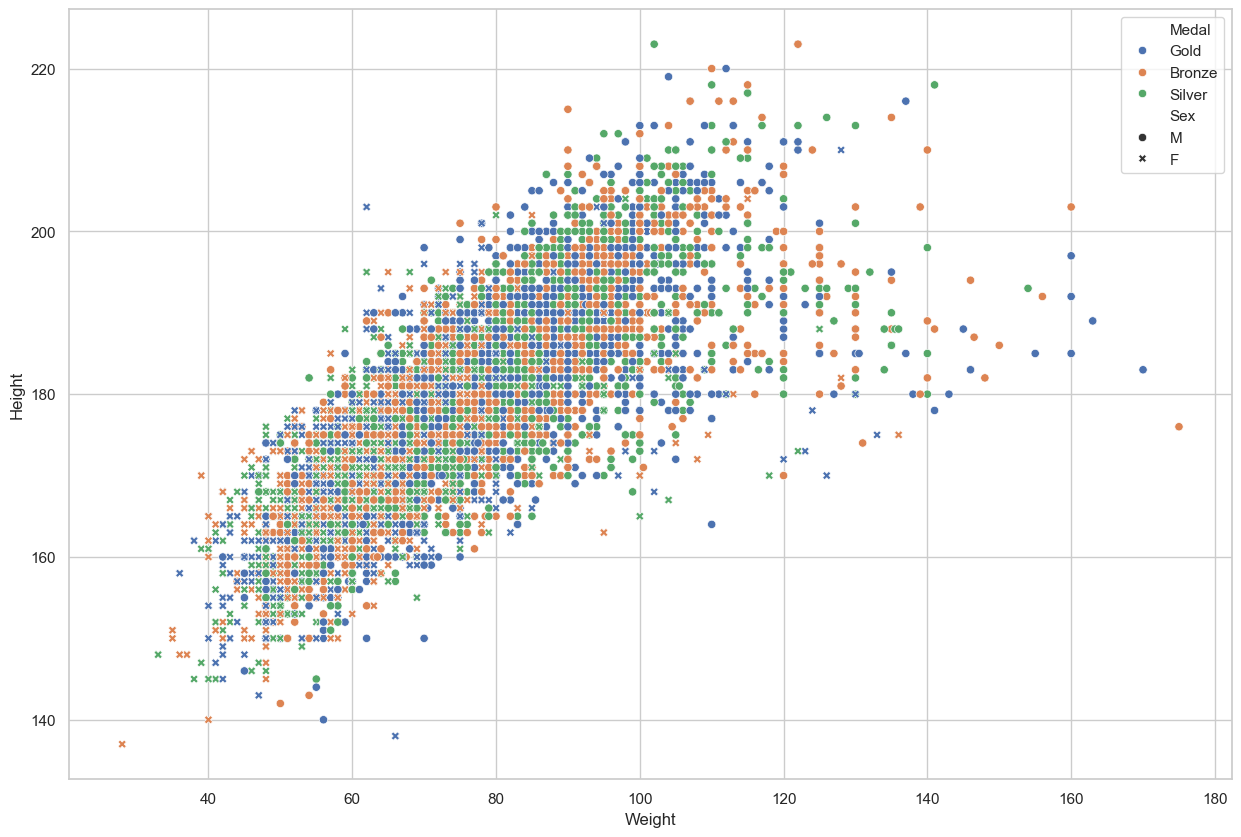

In [120]:
plt.figure(figsize = (15,10))
sns.scatterplot(data=df_atheletes, x= 'Weight',y="Height", hue='Medal',style='Sex', sizes='Medal')
plt.show()

**Observation:**

* The distribution of weight and height among both sexes shows that medal winners are spread across various categories, indicating a diverse range of physical attributes among successful athletes.

### male and female participation over the years

In [121]:
men = df[df['Sex'] == 'M'][['Sex','Year']]
men = men.groupby('Year').count().reset_index()
men.rename(columns = {'Sex':'Male'},inplace = True)
men.head()

,Year,Male
0,1896,380
1,1900,1865
2,1904,1285
3,1906,1722
4,1908,3022


In [122]:
woman = df[df['Sex'] == 'F'][['Sex','Year']]
woman = woman.groupby('Year').count().reset_index()
woman.rename(columns = {'Sex':'Female'},inplace = True)
woman

,Year,Female
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87


In [127]:
men_women_participation = men.merge(woman, on='Year', how = 'left')
men_women_participation.fillna(0, inplace = True)
fig = px.line(men_women_participation, x ='Year', y=['Male','Female'])
fig.show()

**Observation:**
* The graph indicates that there were initially no female participants in the Olympics. However, over the years, participation from both male and female athletes has significantly increased, despite a few dips in male participation during certain periods.

## Final Analysis

* **Significant Growth in Olympic Events:** The number of events conducted in the Olympics has significantly increased over the years, reflecting the expansion and diversification of the Games.

* **Athlete Participation Trends:** The participation of athletes has also seen a substantial rise, with some periods showing slight dips, possibly due to historical events that led to reduced participation from certain countries.

* **Sport Dominance:** From the heatmap analysis, it's clear that athletics and swimming are the most frequently held events, indicating their prominence in the Olympics. In contrast, some sports have been introduced only to be dropped in subsequent editions, such as cricket.

* **Demographics and Gender Participation:** Over the years, there has been a notable increase in participation from both male and female athletes, although the initial years saw no female participants. Despite occasional dips in male participation, the overall trend shows a positive increase in gender diversity.

* **Age Distribution in Sports:** The data reveals that many athletes in most sports tend to participate at a young age. However, certain sports like golf, diving, archery, and rugby feature participants who are typically over 30 years old.

* **Medal Distribution Across Weight and Height:** An analysis of weight and height distribution in both genders shows that medals are fairly distributed across different physical categories, emphasizing the diverse range of athletic abilities that contribute to Olympic success.

These insights provide a comprehensive overview of the evolving dynamics of the Olympic Games, showcasing the growth in events and participation while also highlighting key trends in sport popularity and athlete demographics.
